# Lecture 22: SVD and PCA
## SVD: Singular Value Decomposition
## PCA: Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
%matplotlib inline

## PCA and data preprocessing

Principal Components Analysis (PCA) is a dimensionality reduction algorithm that can be used to significantly speed up our feature(s) learning algorithm. Mathematically speaking, PCA uses a method called Singular Value Decomposition (SVD), in which the singular value resembles the eigenvalue.

Suppose we are training a model to classify our MNIST handwritten digits (28x28 grayscale images). A given training sample in `X_train` is of shape `(784,)`, which has 784 features (dimensions). However, many of these features are somewhat redundant, because the values of adjacent pixels in an image are highly correlated. Concretely, for a training vector $\mathbf{x} = (x_1,\dots, x_{784}) \in \mathbb{R}^{784}$ which is 784 dimensional vectors, with each feature $x_j$ corresponding to the intensity of $j$-th pixel (in the flattened image). Because of the correlation between adjacent pixels, PCA will allow us to approximate the input with a much lower dimensional one, while incurring very little error.

## (Reading) What does PCA exactly do?

PCA will find the most significant "direction" in a dataset, then the second most significant direction, then the third most significant direction,.... so on and so forth.

Let $A\in \mathbb{R}^{n\times d}$ matrix, usually we assume $n>d$

>Singular Value Decomposition (SVD): any real matrix can be decomposed into the following form:
>$$A = U S V^{\top}$$

Where $S\in \mathbb{R}^{n\times d}$ is a diagonal matrix whose diagonal entries are non-negative and in decreasing order. $U\in \mathbb{R}^{n\times n}$ and $V\in \mathbb{R}^{d\times d}$ are orthogonal matrices (i.e. columns of $V$ are orthonormal, same for $U$, $U^{\top}U = UU^{\top} = I$). 

The columns of $V= [\mathbf{v}_1 \mathbf{v}_2 \cdots \mathbf{v}_d]$ are the significant directions we were looking for, which are known as the right singular vectors. Moreover, the columns of $V$ form a $d$-dimensional orthogonal basis.

The columns of $U = [\mathbf{u}_1 \mathbf{u}_2 \cdots \mathbf{u}_n]$ are known as the left singular vectors. 

Sometimes we just say "eigenvectors" instead of "singular vectors".

If some singular values are 0 or very small, we can essentially "discard" those singular values and the corresponding eigenvectors, and still get a reasonably good approximation of our data, hence reducing the dimensions.

Finally, $U$ (or more precisely $U S$) stores how you write each coordinate vector in terms of the significant directions in $V$. 

----

### Geometric meaning

Consider what happens to the unit sphere in our vector space as it isbeing transformed by the matrix $X$. First, we apply some transformation $V^{\top}$, which is essentially a rotation, since $V^{\top}$ is a matrix with orthonormal rows. 

A matrix with orthonormal rows just changes the coordinate axes via some rotation or reflection but does no scaling.

Next, we apply a scaling defined by $S$, which just scales the dimensions since it is a diagonal matrix. 

Finally, we rotate again with $U$. In other words, any transformation can be expressed as a rotation followed by a scaling followed by another rotation. 

----

# Rank-$k$ approximation

The vectors $V= [\mathbf{v}_1 \mathbf{v}_2 \cdots \mathbf{v}_d]$ are such that they describe the most important axis of the data in the following sense. The first eigenvector $\mathbf{v}_1$ describes which direction has the most variance. Then since $\mathbf{v}_2, \cdots, \mathbf{v}_d$ are each orthogonal to $\mathbf{v}_1$, this implies that $\mathbf{v}_2$
is the direction (after $\mathbf{v}_1$ has been factored out) that has the most variance.

The rank $k$ approximation $A_k \in \mathbb{R}^{n\times d}$ of $A$ is as follows: 
$$A_k = U_k S_k V_k^{\top},$$
where $S_k$ is still an $\mathbb{R}^{n\times d}$ matrix, but only with the first $k$ entries being nonzero. In this way, only first $k$ columns of $V$ ($k$ rows of $V^{\top}$) contribute to $A_k$.

----

## Example of Gauss

Let us recall in the beginning of this quarter, and load `Gauss.jpg`, then flatten its color dimension to make a grayscale image.

Reference: [https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)

In [7]:
G = plt.imread("gauss.jpg")

In [8]:
G.shape

(765, 600, 3)

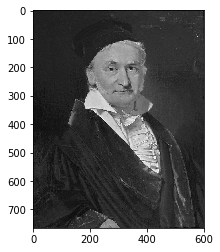

In [9]:
G_bw = np.apply_along_axis(np.mean, axis=2, arr=G)
plt.imshow(G_bw, cmap="gray")

In [10]:
G_bw.shape

(765, 600)

`full_matrices=True` is recommended.
```python
u, s, vh = np.linalg.svd(a, full_matrices=True)
u.shape, s.shape, vh.shape
```

In [11]:
U, S, VT = LA.svd(G_bw)

In [13]:
U.shape, VT.shape

((765, 765), (600, 600))

In [15]:
S.shape
# S is just an array of the SVs if full_matrices = False by default

(600,)

In [16]:
S[:10]

array([45043.25352053, 12681.79832253,  9239.10485425,  7394.71222558,
        4421.56050076,  4114.31939582,  3229.54374248,  3161.05398767,
        2823.93710133,  2423.74371899])

`@` works similar to `np.dot` and `np.matmul`.

In [18]:
arr1 = np.random.randint(1,6,size = [6,5])
arr1

array([[5, 2, 2, 4, 2],
       [4, 4, 1, 4, 5],
       [2, 1, 3, 1, 4],
       [5, 1, 5, 3, 3],
       [1, 2, 1, 2, 2],
       [3, 2, 4, 3, 3]])

In [19]:
np.zeros_like(arr1)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [4]:
S_mat = np.zeros_like(G_bw)
S_mat[:600] = np.diag(S)
# converting S: array to S_mat: diagonal matrix

In [ ]:
# USV^T
U.dot(S_mat.dot(VT))

In [20]:
6 == 6

True

In [5]:
# checking if two arrays are the same within a certain tolerance
np.allclose(G_bw, U.dot(S_mat.dot(VT)))

True

Remark: Or you can use `@`, where the `@` (at) operator is intended to be used for matrix multiplication. This is New in version 3.5.

In [22]:
np.diag(S[:3])

array([[45043.25352053,     0.        ,     0.        ],
       [    0.        , 12681.79832253,     0.        ],
       [    0.        ,     0.        ,  9239.10485425]])

In [23]:
np.diag(S[:k]).shape

(30, 30)

In [36]:
# suppose we only use first k singular values
k = 30
S_k = np.zeros_like(G_bw)
S_k[:k, :k] = np.diag(S[:k])
G_k = (U @ S_k) @ VT

In [37]:
G_k.shape

(765, 600)

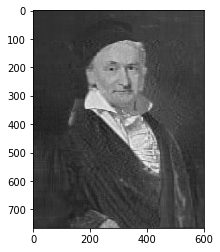

In [38]:
plt.imshow(G_k, cmap="gray")

# Why can we discard the smaller singular values?

Let us use the following artificially generated data as an example.

In [40]:
num_samples = 500
mean = np.array([0,0])
covariance = np.array([[12,  9], [ 9, 10]])
X = np.random.multivariate_normal(mean, covariance, num_samples)

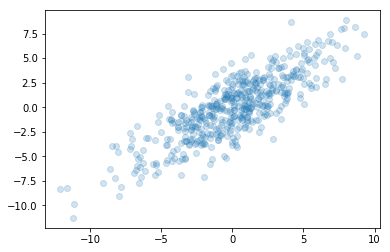

In [41]:
plt.scatter(X[:,0], X[:,1], alpha=0.2)

In [42]:
U, S, VT = LA.svd(X)

In [43]:
VT[0,:] # first eigenvectors

array([-0.74043736, -0.67212537])

In [44]:
VT[1,:] # second eigenvectors

array([ 0.67212537, -0.74043736])

In [45]:
v1 = VT[0,:] * S[0]/20
v2 = VT[1,:] * S[1]/20

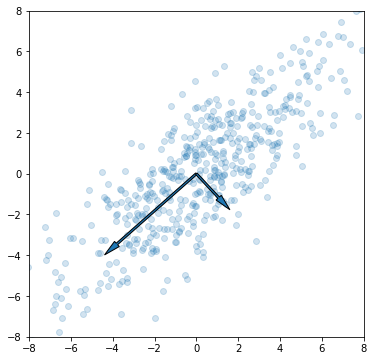

In [46]:
plt.figure(figsize=(6,6))
plt.axis([-8,8,-8,8])
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.arrow(0, 0, v1[0], v1[1], width=0.1, head_width=0.34, head_length=0.8)
plt.arrow(0, 0, v2[0], v2[1], width=0.1, head_width=0.34, head_length=0.8)

# What does the "significance" of a direction mean in data science?


Consider using SVD on the dataset matrix $X\in \mathbb{R}^{N\times d}$, where $X$'s $i$-th row corresponds to the $i$-th data sample. There are $N$ data samples and each data point has $n$ dimensions (features). If the data set is normalized row-wise, i.e., each row (data sample) has mean zero. The significant directions (columns of $V$) are the eigenvectors of the covariance matrix ${\frac{1}{N-1}X^T X}$. The singular values (entries of $S$) are the square roots of the eigenvalues of this covariance matrix.

In other words, $S$'s entries are the amount of deviations of the data in that direction. The covariance matrix tells you how correlated each direction is with other directions in the space where the dataset lives.

## In-class Exercise: MNIST
PCA can be used to speed up a machine learning algorithm (logistic regression) on the MNIST dataset.

Download `mnist_binary_train.npz` and `mnist_binary_test.npz` on Canvas files tab, and load them using the following cell. Then try the following:

* Use `scikit-learn`'s `LogisticRgression` class on the original dataset.
* Import `PCA` from `scikit-learn`'s `decomposition` submodule, apply it on the dataset, re-run the `LogisticRegression` on the reduced dataset.


In [48]:
data_train = np.load('mnist_binary_train.npz')
data_test = np.load('mnist_binary_test.npz')
X_train, y_train = data_train['X'], data_train['y']
X_test, y_test = data_test['X'], data_test['y']

In [49]:
# use scikit-learn's built-in logistic regression
from sklearn.linear_model import LogisticRegression
import time # measure the time

In [50]:
mnist_reg = LogisticRegression(solver='lbfgs', max_iter=500)

In [51]:
starting_time  = time.process_time()
mnist_reg.fit(X_train,y_train)
print("Data fitting takes", time.process_time() - starting_time, "seconds")

Data fitting takes 5.515625 seconds


In [52]:
mnist_reg.score(X_test,y_test)

0.9990543735224586

## Use PCA to reduce the dimension

From the [reference of the `PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html):
> If `0 < n_components < 1` and `svd_solver == 'full'`, select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

The following cell means that the `PCA` class in `scikit-learn` will choose the minimum number of principal components such that 95% of the variance is retained for our data.

In [53]:
from sklearn.decomposition import PCA

In [65]:
mnist_pca = PCA(n_components=0.95)
# n_components = a number between 0 and 1
# PCA class will automatically give us the eigenvectors
# need to retain 95% of the data variance
mnist_pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
X_train_reduced = mnist_pca.transform(X_train)
X_test_reduced = mnist_pca.transform(X_test)

In [67]:
mnist_reg_pca = LogisticRegression(solver='lbfgs', max_iter=500)

In [68]:
starting_time  = time.process_time()
mnist_reg_pca.fit(X_train_reduced,y_train)
print("Data fitting takes", time.process_time() - starting_time, "seconds")

Data fitting takes 2.34375 seconds


In [69]:
mnist_reg_pca.score(X_test_reduced,y_test)

0.9990543735224586